<a href="https://colab.research.google.com/github/bonsnv/Data-Mining/blob/main/Analisis_Kualitas_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/alfkry/Decision-Tree/refs/heads/main/winequality-red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


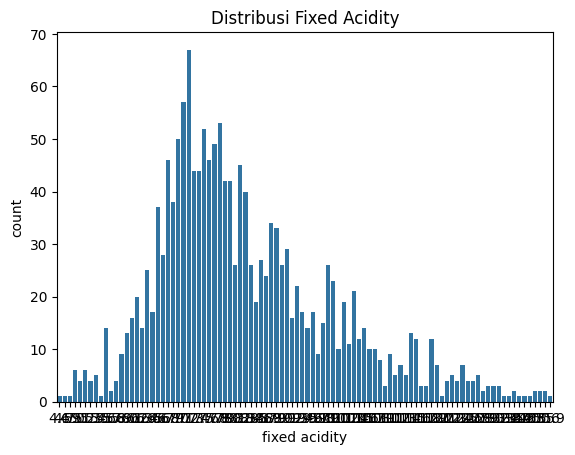

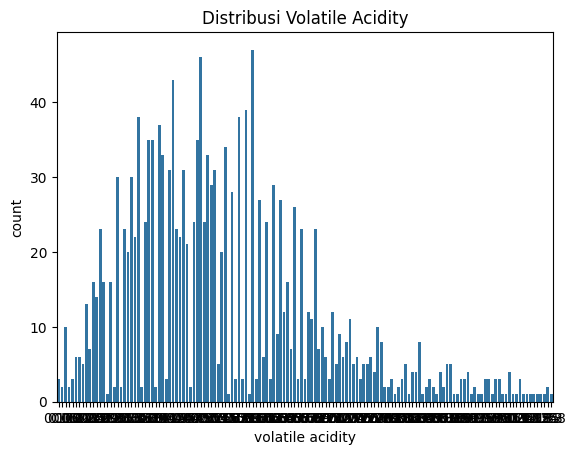

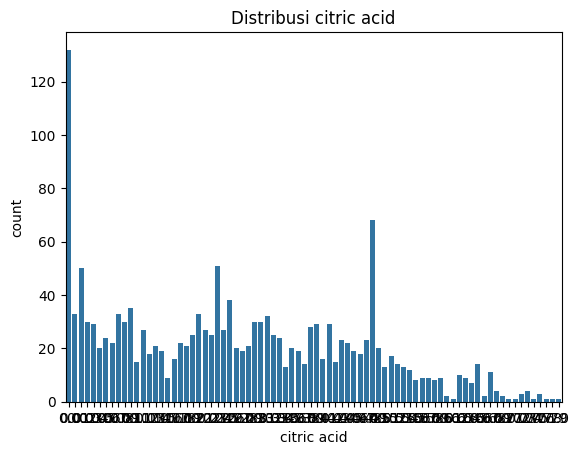

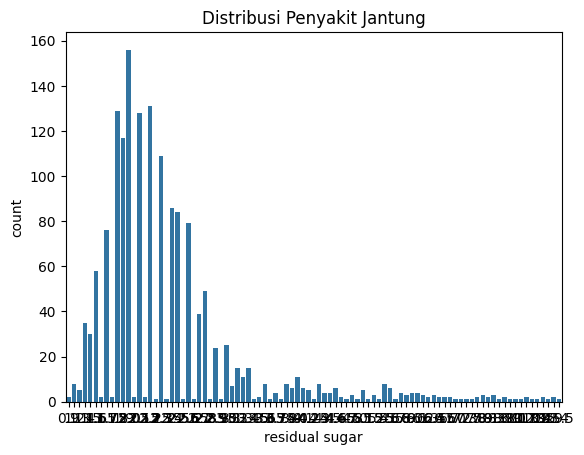

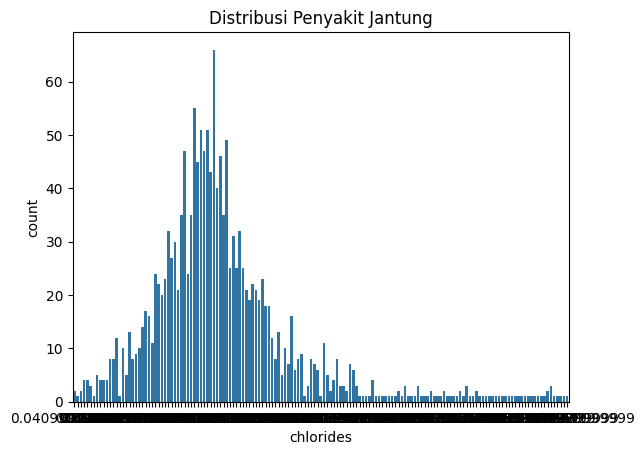

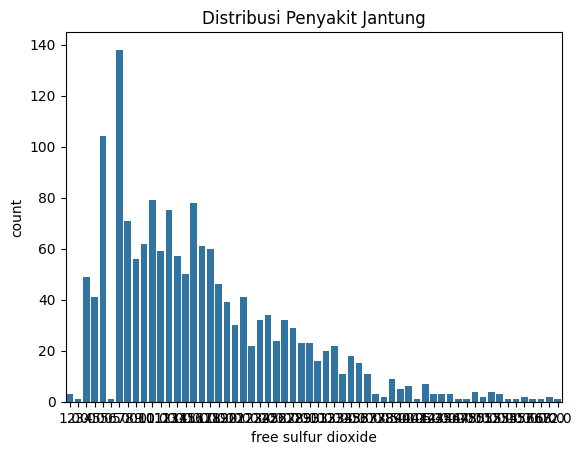

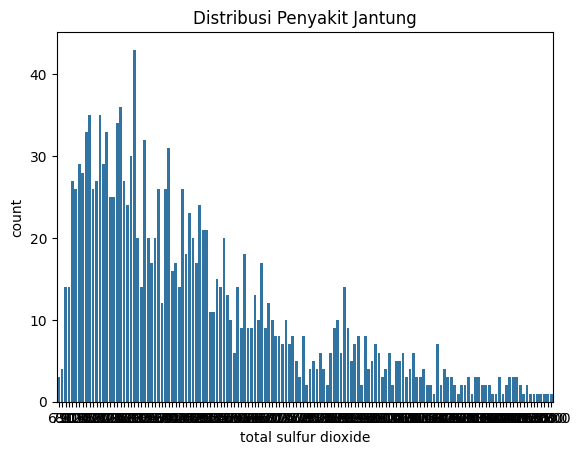

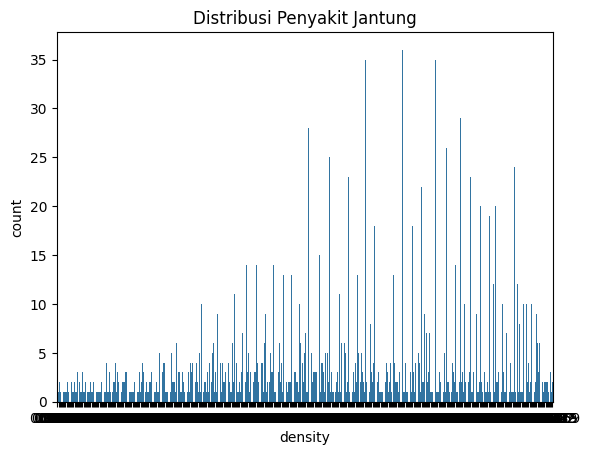

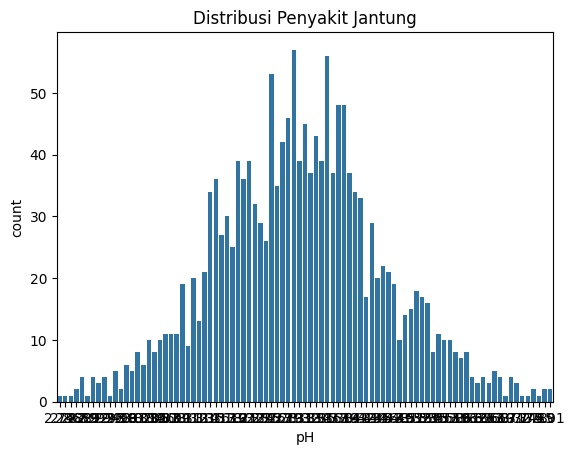

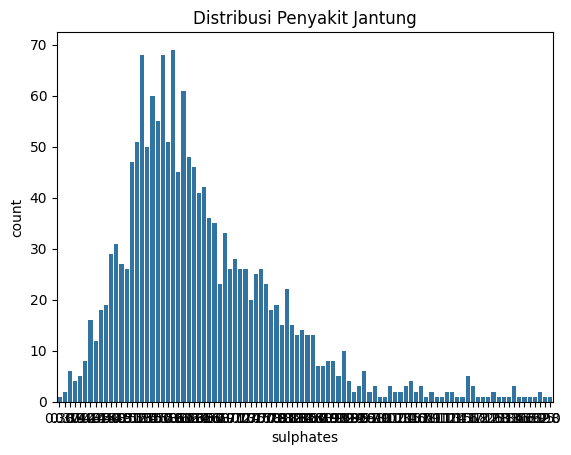

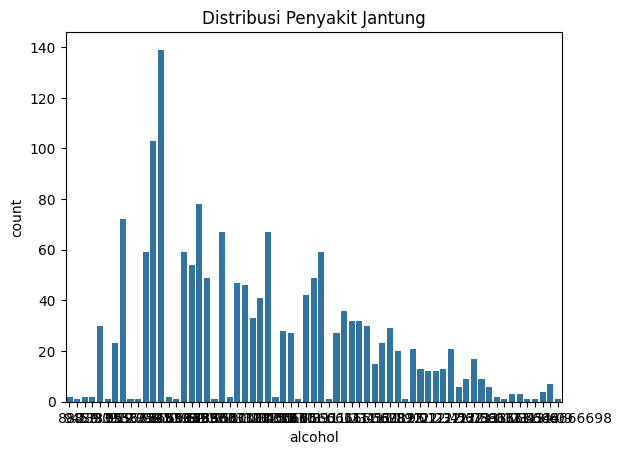

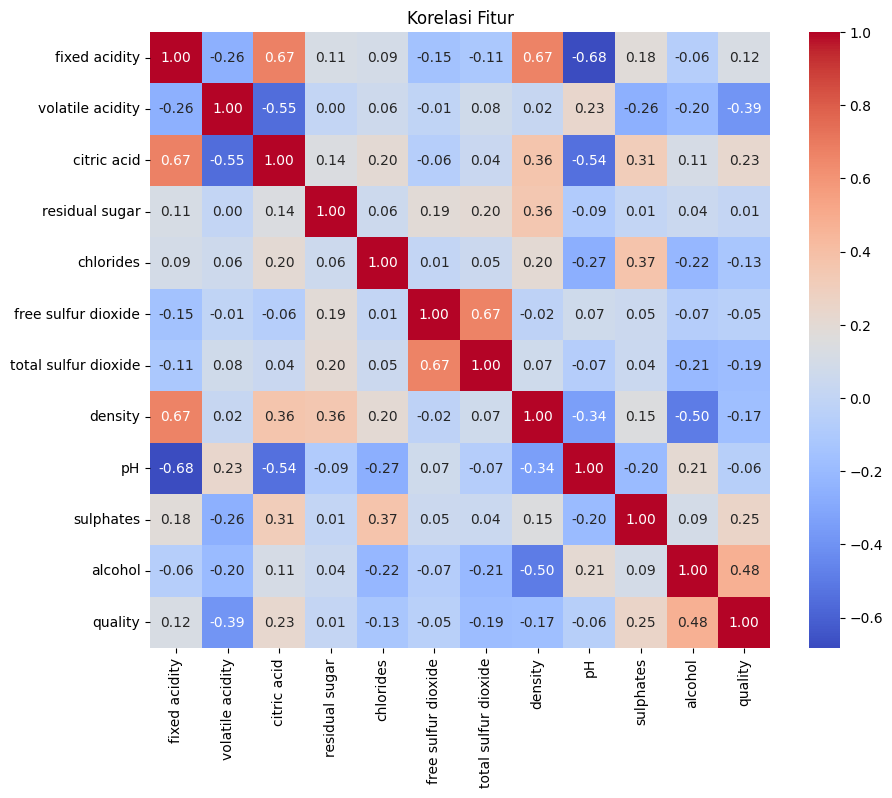

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribusi Wine Quality
sns.countplot(x='fixed acidity', data=data)
plt.title('Distribusi Fixed Acidity')
plt.show()

sns.countplot(x='volatile acidity', data=data)
plt.title('Distribusi Volatile Acidity')
plt.show()

sns.countplot(x='citric acid', data=data)
plt.title('Distribusi citric acid')
plt.show()

sns.countplot(x='residual sugar', data=data)
plt.title('Distribusi Penyakit Jantung')
plt.show()

sns.countplot(x='chlorides', data=data)
plt.title('Distribusi Penyakit Jantung')
plt.show()

sns.countplot(x='free sulfur dioxide', data=data)
plt.title('Distribusi Penyakit Jantung')
plt.show()

sns.countplot(x='total sulfur dioxide', data=data)
plt.title('Distribusi Penyakit Jantung')
plt.show()

sns.countplot(x='density', data=data)
plt.title('Distribusi Penyakit Jantung')
plt.show()

sns.countplot(x='pH', data=data)
plt.title('Distribusi Penyakit Jantung')
plt.show()

sns.countplot(x='sulphates', data=data)
plt.title('Distribusi Penyakit Jantung')
plt.show()

sns.countplot(x='alcohol', data=data)
plt.title('Distribusi Penyakit Jantung')
plt.show()
# Heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Korelasi Fitur')
plt.show()

Hasil eksplorasi menunjukkan beberapa temuan penting:

* Distribusi Fitur:

Sebagian besar fitur menunjukkan distribusi yang beragam, dengan beberapa fitur (seperti volatile acidity dan alcohol) tampak memiliki distribusi yang miring. Hal ini dapat mempengaruhi performa model jika tidak dilakukan normalisasi atau transformasi lebih lanjut.

* Korelasi Antar Fitur:

Matriks korelasi menunjukkan hubungan antara fitur-fitur yang mungkin relevan untuk model. Misalnya:
Terdapat korelasi positif yang cukup kuat antara alcohol dan quality, menunjukkan bahwa wine dengan kadar alkohol lebih tinggi cenderung memiliki kualitas yang lebih baik.
fixed acidity dan citric acid menunjukkan korelasi positif yang signifikan, yang menunjukkan keterkaitan antar variabel kimia ini.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Memisahkan fitur dan label
X = data.drop(columns=['quality'])
y = data['quality']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred = decision_tree.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.559375
Precision: 0.550005791860414
Recall: 0.559375

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.63      0.68      0.65       130
           6       0.55      0.53      0.54       132
           7       0.51      0.50      0.51        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.28      0.28      0.28       320
weighted avg       0.55      0.56      0.55       320



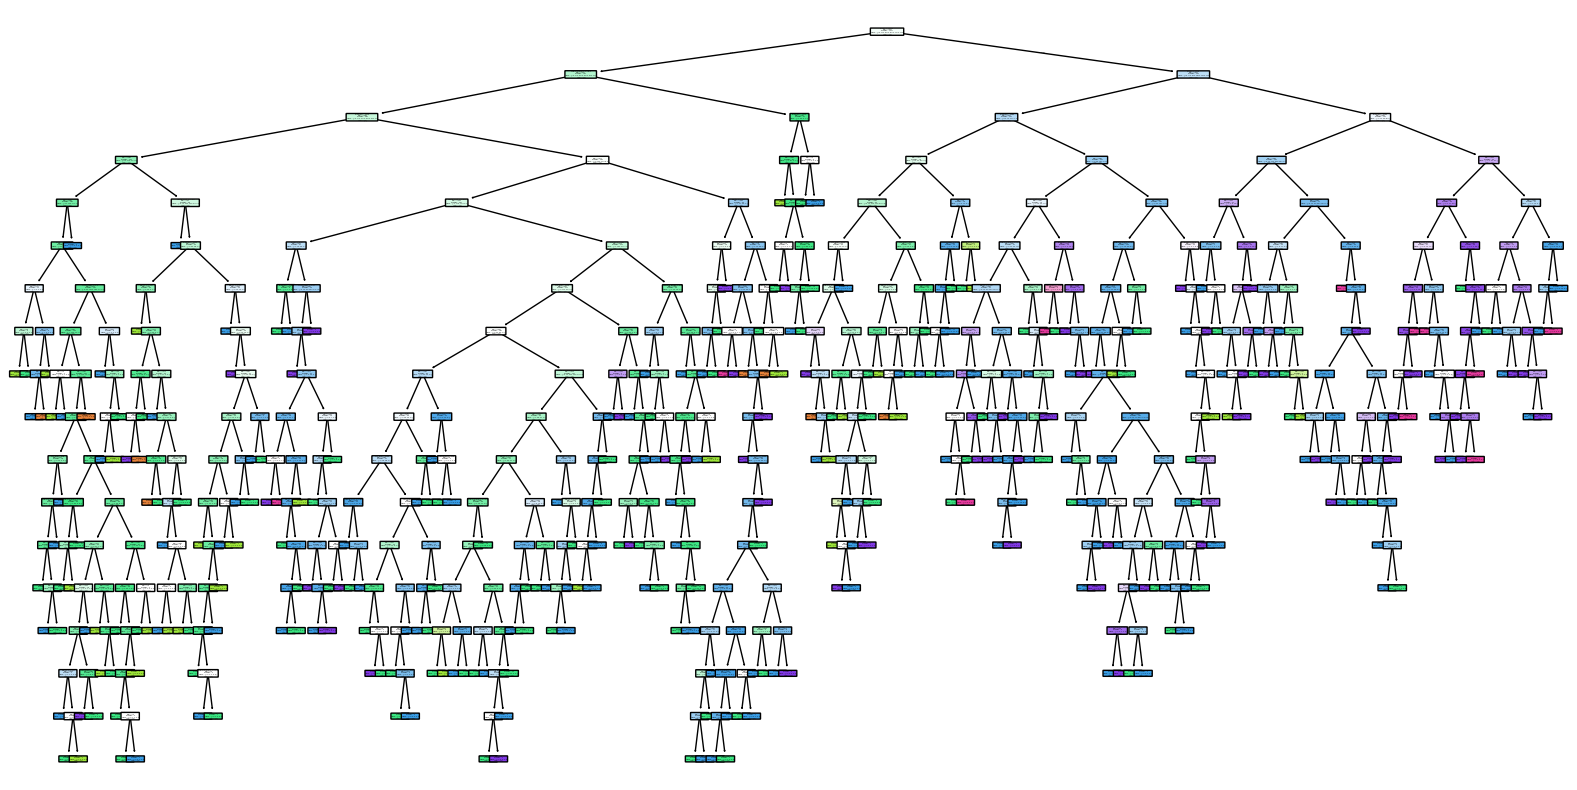

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(decision_tree, feature_names=X.columns, class_names=True, filled=True, rounded=True)
plt.show()
